# Project: Analyzing the online popularity of movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset in which this project is based on contains information about 10,000 movies collected from The Movie Database (TMDb). Among others, it includes data about the movies' popularity, budget, revenue, title, cast, runtime, genre, production, release date, online vote count and average.

The central questions we want to answer in this project are:
- Is there a correlation between the offline popularity of a movie and its popularity in TMDb?
- Which are the properties of the most high-rated movies in TMDb?

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [1]:
%matplotlib inline

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [2]:
# Load the data
movies = pd.read_csv('tmdb-movies.csv')

# Print out the name of the columns
print('Columns of the dataset')
print()
print(movies.columns)
print()
# Print out a few lines.
movies.head(3)

Columns of the dataset

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
# Print out the number of rows and columns of the original dataset
print()
print("Properties of the original data frame. Rows: {0}, Columns: {1}".format(movies.shape[0], movies.shape[1]))


Properties of the original data frame. Rows: 10866, Columns: 21


### Data Cleaning

In [4]:
# Print out the number of rows after NA records were deleted
print()
# Select interested columns
movies_df = movies[['id', 'popularity', 'budget', 'revenue' , 'original_title', 'cast', 'director', 'runtime', 'genres', 'release_date', 'vote_count', 'vote_average']]

# Print out the caracteristics of the dataframe after selecting the interested columns
print("Properties of the data frame after selecting the interested columns. Rows: {0}, Columns: {1}".format(movies_df.shape[0], movies_df.shape[1]))

# Drop movies that have NA in all columns
movies_df = movies_df.dropna(how='all')

# Print out the caracteristics of the dataframe after dropping NA rows
print("Properties of the data frame after dropping NA rows. Rows: {0}, Columns: {1}".format(movies_df.shape[0], movies_df.shape[1]))


Properties of the data frame after selecting the interested columns. Rows: 10866, Columns: 12
Properties of the data frame after dropping NA rows. Rows: 10866, Columns: 12


### Data Transformation

In this section, I create extra variables to hold additional information about the movies.

#### Movies main genre

In [5]:
# Drop movies with NA as genre
movies_df = movies_df[pd.notnull(movies_df.genres)]

# Print out the characteristics of the dataframe after dropping movies without genre
print("Properties of the data frame after dropping movies without genre. Rows: {0}, Columns: {1}".format(movies_df.shape[0], movies_df.shape[1]))
print()

# Create a column to hold the movies' main genre
def main_genre(movie):
    return movie.genres.split('|')[0]

movies_df = movies_df.assign(main_genre=movies_df.apply(main_genre, axis=1))
movies_df.head(5)[['genres','main_genre']]

Properties of the data frame after dropping movies without genre. Rows: 10843, Columns: 12



,genres,main_genre
0,Action|Adventure|Science Fiction|Thriller,Action
1,Action|Adventure|Science Fiction|Thriller,Action
2,Adventure|Science Fiction|Thriller,Adventure
3,Action|Adventure|Science Fiction|Fantasy,Action
4,Action|Crime|Thriller,Action


#### Movies season release

In [6]:
# Create a column to hold the season (winter, summer, fall, spring) in which the movie was released
from datetime import datetime

# Drop movies with NA as release date
movies_df = movies_df[pd.notnull(movies_df.release_date)]

# Print out the characteristics of the dataframe after dropping movies without release date
print("Properties of the data frame after dropping movies without genre. Rows: {0}, Columns: {1}".format(movies_df.shape[0], movies_df.shape[1]))
print()

def season_movie(movie):
    movie_rd = movie['release_date']
    rd = datetime.strptime(movie_rd, "%m/%d/%y")
    if rd.month in (12, 1, 2):
        return 'winter'
    elif rd.month in (3, 4, 5):
        return 'spring'
    elif rd.month in (6, 7, 8):
        return 'summer'
    elif rd.month in (9, 10, 11):
        return 'fall'
    else:
        return 'unknown'

movies_df = movies_df.assign(season=movies_df.apply(season_movie, axis=1))
movies_df.head(5)[['release_date','season']]

Properties of the data frame after dropping movies without genre. Rows: 10843, Columns: 13



,release_date,season
0,6/9/15,summer
1,5/13/15,spring
2,3/18/15,spring
3,12/15/15,winter
4,4/1/15,spring


#### Movies title length

In [7]:
# Create a column to hold the length of the movies' title

# Drop movies with NA as title
movies_df = movies_df[pd.notnull(movies_df.original_title)]

# Print out the characteristics of the dataframe after dropping movies without release date
print("Properties of the data frame after dropping movies without genre. Rows: {0}, Columns: {1}".format(movies_df.shape[0], movies_df.shape[1]))
print()

def title_length(movie):
    title = movie['original_title']
    return len(title)

movies_df = movies_df.assign(title_length=movies_df.apply(title_length, axis=1))
movies_df.head(5)[['original_title','title_length']]

Properties of the data frame after dropping movies without genre. Rows: 10843, Columns: 14



,original_title,title_length
0,Jurassic World,14
1,Mad Max: Fury Road,18
2,Insurgent,9
3,Star Wars: The Force Awakens,28
4,Furious 7,9


<a id='eda'></a>
## Exploratory Data Analysis

### RQ1: Is there a correlation between the offline popularity of a movie and its popularity in TMDb?

To measure offline popularity, we will use the __revenue__ of the movies as the proxy while the metric __popularity__ measures the success of the movies in TMDb. Please refer [here](https://developers.themoviedb.org/3/getting-started/popularity) for more information about how TMDb builds the metric popularity.

In [8]:
# Select columns
movies_rq1 = movies_df[['revenue','popularity','vote_count']]

# Drop movies with NA in revenue and popularity
movies_rq1 = movies_rq1.dropna()

# Print out the characteristics of the dataset to be used in the analysis
print("Properties of the data frame after dropping movies with NA in the interested variables. Rows: {0}, Columns: {1}".format(movies_rq1.shape[0], movies_rq1.shape[1]))
print()

Properties of the data frame after dropping movies with NA in the interested variables. Rows: 10843, Columns: 3



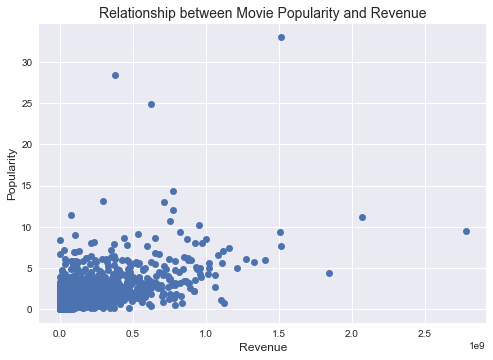

In [9]:
# Visualize the relationship between the variables
plt.plot('revenue', 'popularity', data=movies_rq1, linestyle='none', marker='o')
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
sp_chart = plt.title('Relationship between Movie Popularity and Revenue', fontsize=14)

In [10]:
# Compute correlation
x = np.array(movies_rq1['revenue'])
y = np.array(movies_rq1['popularity'])
cor_x_y = np.corrcoef(x,y)[0][1]
print('The correlation between popularity and revenue is: {0}'.format(cor_x_y))

The correlation between popularity and revenue is: 0.6632661935606454


Interestingly, the movies' popularity in TMDb show be highly and positively correlated with incomes of the movies (cor=0.66). Motivated by the previous result, next we are interested in understanding whether the movies' revenue is also correlated with the number of votes cast by the movie in TMDb. To answer the question, we check the correlation between __revenue__ and __vote_count__.

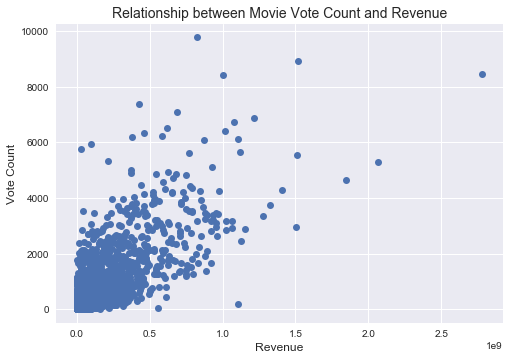

In [11]:
# Visualize the relationship between the variables
plt.plot('revenue', 'vote_count', data=movies_rq1, linestyle='none', marker='o')
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Vote Count', fontsize=12)
sp_chart = plt.title('Relationship between Movie Vote Count and Revenue', fontsize=14)

In [12]:
# Compute correlation
x = np.array(movies_rq1['revenue'])
y = np.array(movies_rq1['vote_count'])
cor_x_y = np.corrcoef(x,y)[0][1]
print('The correlation between number of votes of the movies and their revenue is: {0}'.format(cor_x_y))

The correlation between number of votes of the movies and their revenue is: 0.7911227959310511


### RQ2: Which are the properties of the most high-rated movies in TMDb?

The rating of the movies will be measured through the __popularity__ variable. For the properties of the movies, we will consider the following variables available in the dataset: **budget** and **runtime**. Also, we will use for this analysis the variables we generated before to the movies' **main_genre**, the **length** of their original title, and their **season** of release.

In [13]:
# Selected the interested variables
i_movies_df = movies_df[['popularity', 'budget', 'runtime', 'main_genre', 'title_length', 'season']]

# # Drop movies with NA in revenue and popularity
i_movies_df = i_movies_df.dropna()

# Print out the characteristics of the dataset to be used in the analysis
print("Properties of the data frame after dropping movies with NA in the interested variables. Rows: {0}, Columns: {1}".format(i_movies_df.shape[0], i_movies_df.shape[1]))
print()

Properties of the data frame after dropping movies with NA in the interested variables. Rows: 10843, Columns: 6



#### Present describe statistics for the entire dataset

In [14]:
i_movies_df.describe()

,popularity,budget,runtime,title_length
count,10843.000000,1.084300e+04,10843.000000,10843.000000
mean,0.647456,1.465672e+07,102.137508,15.990409
std,1.000986,3.093864e+07,31.293320,9.108798
min,0.000065,0.000000e+00,0.000000,1.000000
25%,0.208253,0.000000e+00,90.000000,10.000000
50%,0.384555,0.000000e+00,99.000000,14.000000
75%,0.715349,1.500000e+07,111.000000,20.000000
max,32.985763,4.250000e+08,900.000000,104.000000


#### The top-5 main genres

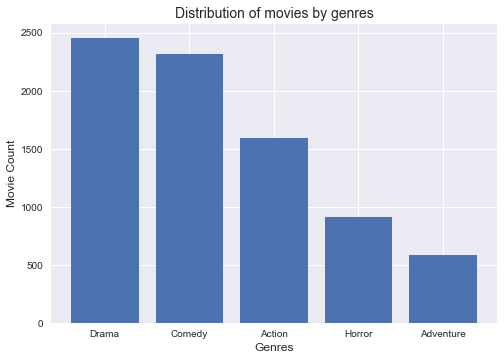

In [15]:
top5_genres = pd.crosstab(index=i_movies_df["main_genre"], columns="count").sort_values('count', ascending=False). \
              head(5).to_dict()['count']
plt.bar(range(len(top5_genres)), top5_genres.values(), align='center')
plt.xticks(range(len(top5_genres)), top5_genres.keys())
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Movie Count', fontsize=12)
bar_chart = plt.title('Distribution of movies by genres', fontsize=14)

#### Number of movies released per season

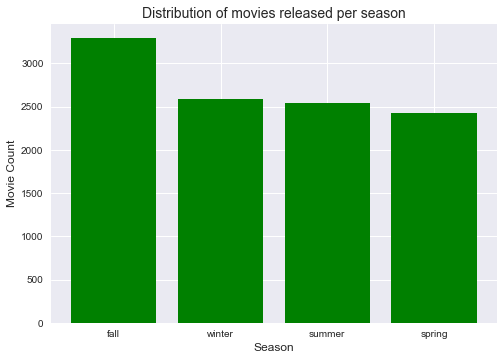

In [16]:
movies_per_season = pd.crosstab(index=i_movies_df["season"], columns="count").sort_values('count', ascending=False). \
                    to_dict()['count']
plt.bar(range(len(movies_per_season)), movies_per_season.values(), align='center', color='green')
plt.xticks(range(len(movies_per_season)), movies_per_season.keys())
plt.xlabel('Season', fontsize=12)
plt.ylabel('Movie Count', fontsize=12)
bar_chart2 = plt.title('Distribution of movies released per season', fontsize=14)

#### Split the dataset in to two groups: the top-50 high-rated movies and the rest

In [17]:
# Sort the data from high to low popularity
i_movies_df = i_movies_df.sort_values('popularity', ascending=False)
i_50_movies_df = i_movies_df[:50]
i_51_movies_df = i_movies_df[51:]

#### Show the average properties of both groups, the 50 most high-rated movies and the rest

In [18]:
mean_50 = i_50_movies_df.describe().iloc[1].tolist()
mean_51 = i_51_movies_df.describe().iloc[1].tolist()
pd.DataFrame(data=[mean_50, mean_51], 
             columns=['popularity', 'budget', 'runtime', 'title_length (num_char)'],
             index=['top-50', 'rest'])

,popularity,budget,runtime,title_length (num_char)
top-50,9.471139,1.115000e+08,130.000000,18.720000
rest,0.606070,1.420292e+07,102.003706,15.977391


#### Show the list of main genres in both groups

In [19]:
main_genres_i50 = pd.crosstab(index=i_50_movies_df['main_genre'], columns=['count']). \
                  sort_values(by='count', ascending=False).head(5).to_dict()['count']
main_genres_i51 = pd.crosstab(index=i_51_movies_df['main_genre'], columns=['count']). \
                  sort_values(by='count', ascending=False).head(5).to_dict()['count']
pd.DataFrame(data=[main_genres_i50.keys(), main_genres_i51.keys()],
             columns=['Rank1', 'Rank2', 'Rank3', 'Rank4', 'Rank5'],
             index=['top-50', 'rest'])

,Rank1,Rank2,Rank3,Rank4,Rank5
top-50,Action,Adventure,Drama,Science Fiction,Comedy
rest,Drama,Comedy,Action,Horror,Adventure


#### Show the number of movies per season in both groups

In [20]:
seasons_i50 = pd.crosstab(index=i_50_movies_df['season'], columns='count'). \
              sort_values(by='count', ascending=False).to_dict()['count']
seasons_i51 = pd.crosstab(index=i_51_movies_df['season'], columns='count'). \
              sort_values(by='count', ascending=False).to_dict()['count']
pd.DataFrame(data=[seasons_i50.keys(), seasons_i51.keys()],
             columns=['Rank1', 'Rank2', 'Rank3', 'Rank4'],
             index=['top-50', 'rest'])

,Rank1,Rank2,Rank3,Rank4
top-50,fall,summer,winter,spring
rest,fall,winter,summer,spring


<a id='conclusions'></a>
## Conclusions

### RQ1: Is there a correlation between the offline popularity of a movie and its popularity in TMDb?

We found that the movies' popularity in TMDb shows to be highly and positively correlated with incomes of the movies (cor=0.64). Moreover, we saw that the revenue of a movie is associated (cor=0.80) with the number of votes casted by the movie in TMDb. So, it seems that there is some sort of association between the success of movies in the box offices and their online valuation.

### RQ2: Which are the properties of the most high-rated movies in TMDb?

Through the last analyses, we found some interesting properties that distinguished the top-50 high-rated movies from the rest. Fist, we saw that the top-50 high-rated movies invest more economic resources in their production than the rest. Also, we discovered that they are longer and named with longer titles. Besides, we found that their primary genres are, in general, different from the rest. The top-50 high-rated movies are mainly action and adventure films while the rest are more drama and comedy movies. However, we didn't find differences concerning the season release of the movies in both groups. In both cases, the periods of most premiers are fall and summer.

We haven't measure whether the discovered differences are significant, but from the results above there are some final comments we want to make. While it might be evident that expensive movies have higher chances of being successful, it is important to highlight the three aspects that characterize popular movies, which should be taken into account by producers. First, high-rated movies are longer, which seems to indicate that probably people like movies that spend more time in developing the story. Second, movies that attract the attention of the Internet users are usually those with high energy and exciting stories.